In [1]:
# Dependencies
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
csv_path = "Resources/videos.csv"
df = pd.read_csv(csv_path)
# df.head(10)

In [3]:
# clean up data before creating dataframe for calculations
df_path = "Resources/videos.csv"
df = pd.read_csv(df_path)

df[["publish date", "asdf"]] = df["publish_time"].str.split(pat="T", n=1, expand=True)


df[["publish time", "trash"]] = df["asdf"].str.split(pat=".", n=1, expand=True)


df["publish date"] = pd.to_datetime(df["publish date"])
df["publish_date"] = df["publish date"].dt.strftime('%m/%d/%Y')


category_json_path = "Resources/US_category_id.json"
category_dict = {'category_id': [], 'Category': []}
indexer = 0

with open(category_json_path) as json_data:
  data = json.load(json_data)

items = data['items']
items

for item in items:
    
    category_dict['category_id'].append(data['items'][indexer]['id'])
    category_dict['Category'].append(data['items'][indexer]['snippet']['title'])
    indexer = indexer + 1
        


category_df = pd.DataFrame(category_dict)
category_df["category_id"] = category_df["category_id"].astype(int)
df = df.merge(category_df, how='inner', on='category_id')



df["trending_date"]=pd.to_datetime(df["trending_date"].astype(str), format="%y.%d.%m")
df["trending_date"] = df["trending_date"].dt.strftime("%m/%d/%Y")
#df.head()

In [4]:
# clean up data frame for only columns we want to work with
df = df[["video_id", "title", "channel_title", "Category", "publish time", "publish_date", "trending_date", "views", "likes", "dislikes", "tags", "comments_disabled"]]
#df.head()

In [5]:
# data frame with rows for last trending date
last_df = df[['video_id', 'trending_date']]
last_df = last_df.groupby('video_id').max()
last_df = last_df.reset_index()
last_df = last_df.merge(df, how ='left')
last_df.head()

,video_id,trending_date,title,channel_title,Category,publish time,publish_date,views,likes,dislikes,tags,comments_disabled
0,-0CMnp02rNY,06/11/2018,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,Entertainment,13:00:00,06/04/2018,800359,9773,332,"ellen|""ellen degeneres""|""the ellen show""|""elle...",False
1,-0NYY8cqdiQ,02/01/2018,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,Entertainment,14:00:39,01/29/2018,563746,4429,54,"megan mullally|""megan""|""mullally""|""will and gr...",False
2,-1Hm41N0dUs,05/01/2018,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,Comedy,07:30:02,04/27/2018,2058516,41248,580,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",False
3,-1yT-K3c6YI,12/02/2017,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,People & Blogs,18:30:43,11/28/2017,231341,7734,212,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",False
4,-2RVw2_QyxQ,11/16/2017,2017 Champions Showdown: Day 3,Saint Louis Chess Club,Education,02:39:01,11/12/2017,71089,460,27,"Chess|""Saint Louis""|""Club""",False


In [6]:
# data frame with rows for first trending date
first_df = df[['video_id', 'trending_date']]
first_df = first_df.groupby('video_id').min()
first_df = first_df.reset_index()
first_df = first_df.merge(df, how ='left')
#first_df.head()

In [7]:
# Mike's Code

In [8]:
# Riley's Code

In [11]:
# Split the Publish time column by the hour, convert to integer

publish_df = last_df
publish_df[["publish_hour", "publish_min_sec"]] = publish_df["publish time"].str.split(":", n=1, expand=True)
publish_df['publish_hour'] = publish_df['publish_hour'].astype(int)
# publish_df.head()

,video_id,trending_date,title,channel_title,Category,publish time,publish_date,views,likes,dislikes,tags,comments_disabled,publish_hour,publish_min_sec
0,-0CMnp02rNY,06/11/2018,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,Entertainment,13:00:00,06/04/2018,800359,9773,332,"ellen|""ellen degeneres""|""the ellen show""|""elle...",False,13,00:00
1,-0NYY8cqdiQ,02/01/2018,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,Entertainment,14:00:39,01/29/2018,563746,4429,54,"megan mullally|""megan""|""mullally""|""will and gr...",False,14,00:39
2,-1Hm41N0dUs,05/01/2018,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,Comedy,07:30:02,04/27/2018,2058516,41248,580,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",False,7,30:02
3,-1yT-K3c6YI,12/02/2017,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,People & Blogs,18:30:43,11/28/2017,231341,7734,212,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",False,18,30:43
4,-2RVw2_QyxQ,11/16/2017,2017 Champions Showdown: Day 3,Saint Louis Chess Club,Education,02:39:01,11/12/2017,71089,460,27,"Chess|""Saint Louis""|""Club""",False,2,39:01


In [14]:
# New DF grouped by the publish hour

publish_group_df = publish_df.groupby('publish_hour').count()
publish_group_df = publish_group_df['video_id']
# publish_group_df

publish_hour
0     222
1     194
2     172
3     173
4     186
5     221
6     105
7     125
8     151
9      90
10     98
11    149
12    204
13    328
14    430
15    504
16    578
17    529
18    433
19    312
20    327
21    296
22    292
23    235
Name: video_id, dtype: int64

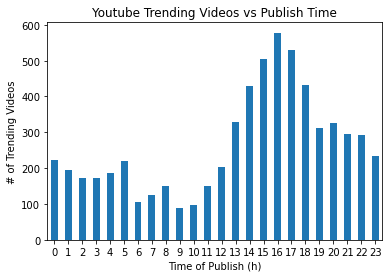

In [22]:
# Plot # of trending videos by publish time

publish_group_df.plot(kind='bar', rot = 0)

plt.xlabel('Time of Publish (h)')
plt.ylabel('# of Trending Videos')
plt.title('Youtube Trending Videos vs Publish Time')
plt.show()

In [ ]:
# Jackie's Code

In [ ]:
# Brian's Code

In [ ]:
#this is my test cell to merge